In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import f_oneway

def get_working_dir():
    return Path.cwd()

# Mapping for accuracy responses.
accuracy_mapping = {
    "Completely inaccurate": 1,
    "Somewhat inaccurate": 2,
    "Neither accurate nor inaccurate": 3,
    "Somewhat accurate": 4,
    "Completely accurate": 5
}

# Function to compute AI belief change using even-numbered claims (2,4,6,8,10).
def compute_ai_belief_change(df):
    ai_claims = [2, 4, 6, 8, 10]
    changes = []
    for i in ai_claims:
        pre_col = f"claim{i}_pre_accuracy"
        post_col = f"claim{i}_post_accuracy"
        if pre_col in df.columns and post_col in df.columns:
            # Map textual responses to numeric.
            if df[pre_col].dtype == object:
                df[pre_col] = df[pre_col].str.strip().map(accuracy_mapping)
            if df[post_col].dtype == object:
                df[post_col] = df[post_col].str.strip().map(accuracy_mapping)
            changes.append(df[post_col] - df[pre_col])
    if changes:
        return pd.concat(changes, axis=1).mean(axis=1)
    else:
        return pd.Series(np.nan, index=df.index)

# Function to process a single phase file and compute AI belief change.
def process_phase_file(file_name, expl_type_label):
    path = get_working_dir() / 'data' / 'processed' / file_name
    df = pd.read_csv(path, encoding='utf-8', dtype={'prolific_id': str})
    df["ai_belief_change"] = compute_ai_belief_change(df)
    df["expl_type"] = expl_type_label
    return df[['prolific_id', 'ai_belief_change', 'expl_type']].dropna()

# List of phase files with their corresponding explanation type labels.
phase_files = [
    ("t_phase6.csv", "Text"),
    ("m_phase7.csv", "Meme"),
    ("m_t_phase6.csv", "Meme+Context")
]

# Process each file.
dfs = []
for file_name, label in phase_files:
    dfs.append(process_phase_file(file_name, label))
    
# Combine data from all explanation types (collapse across them).
df_combined = pd.concat(dfs, ignore_index=True)

# Print descriptive statistics for AI belief change by explanation type.
print("Descriptive statistics for AI belief change by explanation type:")
for expl in df_combined["expl_type"].unique():
    subset = df_combined[df_combined["expl_type"] == expl]
    print(f"\nExplanation Type: {expl}")
    print(subset["ai_belief_change"].describe())

# Run one-way ANOVA to test if AI belief change differs by explanation type.
groups = [group["ai_belief_change"].values for name, group in df_combined.groupby("expl_type")]
anova_result = f_oneway(*groups)
print("\nOne-way ANOVA result for AI belief change across explanation types:")
print(f"F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.3e}")

# Optionally, create a pivot table to show mean AI belief change per explanation type.
pivot_means = df_combined.pivot_table(index="expl_type", values="ai_belief_change", aggfunc="mean")
print("\nMean AI belief change by explanation type:")
print(pivot_means)


Descriptive statistics for AI belief change by explanation type:

Explanation Type: Text
count    110.000000
mean       0.040000
std        1.031184
min       -2.400000
25%       -0.800000
50%        0.000000
75%        0.800000
max        3.000000
Name: ai_belief_change, dtype: float64

Explanation Type: Meme
count    101.000000
mean      -0.550495
std        0.801701
min       -3.000000
25%       -1.000000
50%       -0.400000
75%        0.000000
max        1.600000
Name: ai_belief_change, dtype: float64

Explanation Type: Meme+Context
count    102.000000
mean      -0.105882
std        1.010325
min       -2.600000
25%       -0.800000
50%       -0.200000
75%        0.600000
max        2.000000
Name: ai_belief_change, dtype: float64

One-way ANOVA result for AI belief change across explanation types:
F = 10.750, p = 3.063e-05

Mean AI belief change by explanation type:
              ai_belief_change
expl_type                     
Meme                 -0.550495
Meme+Context         -0.10

# Confidence change for ai explanations

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import f_oneway

def get_working_dir():
    return Path.cwd()

# Mapping for confidence responses.
confidence_mapping = {
    "Not at all confident": 1,
    "Slightly confident": 2,
    "Moderately confident": 3,
    "Very confident": 4,
    "Extremely confident": 5
}

# Function to compute AI confidence change using even-numbered claims (2,4,6,8,10).
def compute_ai_confidence_change(df):
    # Even-numbered claims assumed to use AI explanations.
    ai_claims = [2, 4, 6, 8, 10]
    changes = []
    for i in ai_claims:
        pre_col = f"claim{i}_pre_confidence"
        post_col = f"claim{i}_post_confidence"
        if pre_col in df.columns and post_col in df.columns:
            # Map textual responses to numeric if needed.
            if df[pre_col].dtype == object:
                df[pre_col] = df[pre_col].str.strip().map(confidence_mapping)
            if df[post_col].dtype == object:
                df[post_col] = df[post_col].str.strip().map(confidence_mapping)
            changes.append(df[post_col] - df[pre_col])
    if changes:
        return pd.concat(changes, axis=1).mean(axis=1)
    else:
        return pd.Series(np.nan, index=df.index)

# Process a single phase file: compute AI confidence change and add an explanation type label.
def process_phase_file(file_name, expl_type_label):
    path = get_working_dir() / 'data' / 'processed' / file_name
    df = pd.read_csv(path, encoding='utf-8', dtype={'prolific_id': str})
    df["ai_confidence_change"] = compute_ai_confidence_change(df)
    df["expl_type"] = expl_type_label
    return df[['prolific_id', 'ai_confidence_change', 'expl_type']].dropna()

# List of phase files with their explanation type labels.
phase_files = [
    ("t_phase6.csv", "Text"),
    ("m_phase7.csv", "Meme"),
    ("m_t_phase6.csv", "Meme+Context")
]

dfs = []
for file_name, label in phase_files:
    dfs.append(process_phase_file(file_name, label))
    
# Combine data from all explanation types.
df_combined = pd.concat(dfs, ignore_index=True)

# Print descriptive statistics for AI confidence change by explanation type.
print("Descriptive statistics for AI confidence change by explanation type:")
for expl in df_combined["expl_type"].unique():
    subset = df_combined[df_combined["expl_type"] == expl]
    print(f"\nExplanation Type: {expl}")
    print(subset["ai_confidence_change"].describe())

# Run one-way ANOVA to test if AI confidence change differs across explanation types.
groups = [group["ai_confidence_change"].values for name, group in df_combined.groupby("expl_type")]
anova_result = f_oneway(*groups)
print("\nOne-way ANOVA result for AI confidence change across explanation types:")
print(f"F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.3e}")

# Optionally, display a pivot table of mean AI confidence change.
pivot_means = df_combined.pivot_table(index="expl_type", values="ai_confidence_change", aggfunc="mean")
print("\nMean AI confidence change by explanation type:")
print(pivot_means)

Descriptive statistics for AI confidence change by explanation type:

Explanation Type: Text
count    110.000000
mean       0.427273
std        0.725664
min       -1.600000
25%        0.000000
50%        0.400000
75%        1.000000
max        2.200000
Name: ai_confidence_change, dtype: float64

Explanation Type: Meme
count    101.000000
mean      -0.229703
std        0.495085
min       -1.400000
25%       -0.600000
50%       -0.200000
75%        0.000000
max        0.800000
Name: ai_confidence_change, dtype: float64

Explanation Type: Meme+Context
count    102.000000
mean       0.184314
std        0.677612
min       -1.200000
25%       -0.200000
50%        0.000000
75%        0.600000
max        2.400000
Name: ai_confidence_change, dtype: float64

One-way ANOVA result for AI confidence change across explanation types:
F = 27.884, p = 7.313e-12

Mean AI confidence change by explanation type:
              ai_confidence_change
expl_type                         
Meme                     

# Engagement change ai explanations

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import f_oneway

def get_working_dir():
    return Path.cwd()

# Mapping for engagement responses.
engagement_mapping = {
    "Very unlikely": 1,
    "Somewhat unlikely": 2,
    "Neither likely nor unlikely": 3,
    "Somewhat likely": 4,
    "Very likely": 5
}

# Function to compute AI engagement change using even-numbered claims (2, 4, 6, 8, 10).
def compute_ai_engagement_change(df):
    ai_claims = [2, 4, 6, 8, 10]
    changes = []
    for i in ai_claims:
        pre_col = f"claim{i}_pre_engagement"
        post_col = f"claim{i}_post_engagement"
        if pre_col in df.columns and post_col in df.columns:
            if df[pre_col].dtype == object:
                df[pre_col] = df[pre_col].str.strip().map(engagement_mapping)
            if df[post_col].dtype == object:
                df[post_col] = df[post_col].str.strip().map(engagement_mapping)
            changes.append(df[post_col] - df[pre_col])
    if changes:
        return pd.concat(changes, axis=1).mean(axis=1)
    else:
        return pd.Series(np.nan, index=df.index)

# Process a single phase file: compute AI engagement change and assign explanation type label.
def process_phase_file(file_name, expl_type_label):
    path = get_working_dir() / 'data' / 'processed' / file_name
    df = pd.read_csv(path, encoding='utf-8', dtype={'prolific_id': str})
    df["ai_engagement_change"] = compute_ai_engagement_change(df)
    df["expl_type"] = expl_type_label
    return df[['prolific_id', 'ai_engagement_change', 'expl_type']].dropna()

# List phase files and their corresponding explanation type labels.
phase_files = [
    ("t_phase6.csv", "Text"),
    ("m_phase7.csv", "Meme"),
    ("m_t_phase6.csv", "Meme+Context")
]

# Process each file.
dfs = []
for file_name, label in phase_files:
    dfs.append(process_phase_file(file_name, label))
    
# Combine data from all explanation types.
df_combined = pd.concat(dfs, ignore_index=True)

# Print descriptive statistics for AI engagement change by explanation type.
print("Descriptive statistics for AI engagement change by explanation type:")
for expl in df_combined["expl_type"].unique():
    subset = df_combined[df_combined["expl_type"] == expl]
    print(f"\nExplanation Type: {expl}")
    print(subset["ai_engagement_change"].describe())

# Run one-way ANOVA to test if AI engagement change differs across explanation types.
groups = [group["ai_engagement_change"].values for name, group in df_combined.groupby("expl_type")]
anova_result = f_oneway(*groups)
print("\nOne-way ANOVA result for AI engagement change across explanation types:")
print(f"F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.3e}")

# Optionally, display a pivot table of mean AI engagement change by explanation type.
pivot_means = df_combined.pivot_table(index="expl_type", values="ai_engagement_change", aggfunc="mean")
print("\nMean AI engagement change by explanation type:")
print(pivot_means)

Descriptive statistics for AI engagement change by explanation type:

Explanation Type: Text
count    110.000000
mean      -0.010909
std        0.374250
min       -1.200000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ai_engagement_change, dtype: float64

Explanation Type: Meme
count    101.000000
mean      -0.261386
std        0.500194
min       -1.800000
25%       -0.600000
50%       -0.200000
75%        0.000000
max        1.200000
Name: ai_engagement_change, dtype: float64

Explanation Type: Meme+Context
count    102.000000
mean      -0.098039
std        0.459656
min       -1.600000
25%       -0.200000
50%        0.000000
75%        0.200000
max        1.000000
Name: ai_engagement_change, dtype: float64

One-way ANOVA result for AI engagement change across explanation types:
F = 8.494, p = 2.561e-04

Mean AI engagement change by explanation type:
              ai_engagement_change
expl_type                         
Meme                     -

# Explainability ai explanations

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import f_oneway

def get_working_dir():
    return Path.cwd()

# Mapping for correction explainability responses.
explainability_mapping = {
    "Not at all well conveyed": 1,
    "Slightly well conveyed": 2,
    "Moderately well conveyed": 3,
    "Very well conveyed": 4,
    "Extremely well conveyed": 5
}

# Function to compute AI explainability using even-numbered claims (2, 4, 6, 8, 10).
def compute_ai_explainability(df):
    ai_claims = [2, 4, 6, 8, 10]
    values = []
    for i in ai_claims:
        col = f"claim{i}_correction_explainability"
        if col in df.columns:
            if df[col].dtype == object:
                df[col] = df[col].str.strip().map(explainability_mapping)
            values.append(df[col])
    if values:
        # Average across the even-numbered claims.
        return pd.concat(values, axis=1).mean(axis=1)
    else:
        return pd.Series(np.nan, index=df.index)

# Process a single phase file: compute AI explainability and add explanation type label.
def process_phase_file(file_name, expl_type_label):
    path = get_working_dir() / 'data' / 'processed' / file_name
    df = pd.read_csv(path, encoding='utf-8', dtype={'prolific_id': str})
    df["ai_explainability"] = compute_ai_explainability(df)
    df["expl_type"] = expl_type_label
    return df[['prolific_id', 'ai_explainability', 'expl_type']].dropna()

# Define the phase files and their corresponding explanation type labels.
phase_files = [
    ("t_phase6.csv", "Text"),
    ("m_phase7.csv", "Meme"),
    ("m_t_phase6.csv", "Meme+Context")
]

dfs = []
for file_name, label in phase_files:
    dfs.append(process_phase_file(file_name, label))
    
# Combine data from all explanation types (collapsed across them).
df_combined = pd.concat(dfs, ignore_index=True)

# Print descriptive statistics for AI explainability by explanation type.
print("Descriptive statistics for AI explainability by explanation type:")
for expl in df_combined["expl_type"].unique():
    subset = df_combined[df_combined["expl_type"] == expl]
    print(f"\nExplanation Type: {expl}")
    print(subset["ai_explainability"].describe())

# Run one-way ANOVA to test if AI explainability differs across explanation types.
groups = [group["ai_explainability"].values for name, group in df_combined.groupby("expl_type")]
anova_result = f_oneway(*groups)
print("\nOne-way ANOVA result for AI explainability across explanation types:")
print(f"F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.3e}")

# Optionally, display a pivot table of mean AI explainability by explanation type.
pivot_means = df_combined.pivot_table(index="expl_type", values="ai_explainability", aggfunc="mean")
print("\nMean AI explainability by explanation type:")
print(pivot_means)

Descriptive statistics for AI explainability by explanation type:

Explanation Type: Text
count    110.000000
mean       3.489091
std        0.790116
min        1.600000
25%        3.000000
50%        3.600000
75%        4.150000
max        5.000000
Name: ai_explainability, dtype: float64

Explanation Type: Meme
count    101.000000
mean       2.853465
std        0.925156
min        1.000000
25%        2.200000
50%        3.000000
75%        3.600000
max        4.600000
Name: ai_explainability, dtype: float64

Explanation Type: Meme+Context
count    102.000000
mean       3.217647
std        0.726910
min        1.400000
25%        2.800000
50%        3.200000
75%        3.800000
max        4.800000
Name: ai_explainability, dtype: float64

One-way ANOVA result for AI explainability across explanation types:
F = 15.984, p = 2.473e-07

Mean AI explainability by explanation type:
              ai_explainability
expl_type                      
Meme                   2.853465
Meme+Context     

# Credibility ai explanations

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import f_oneway

def get_working_dir():
    return Path.cwd()

# Mapping for correction credibility responses.
credibility_mapping = {
    "Not at all credible": 1,
    "Slightly credible": 2,
    "Moderately credible": 3,
    "Very credible": 4,
    "Extremely credible": 5
}

# Function to compute AI credibility using even-numbered claims (2, 4, 6, 8, 10).
def compute_ai_credibility(df):
    ai_claims = [2, 4, 6, 8, 10]
    values = []
    for i in ai_claims:
        col = f"claim{i}_correction_credibility"
        if col in df.columns:
            if df[col].dtype == object:
                df[col] = df[col].str.strip().map(credibility_mapping)
            values.append(df[col])
    if values:
        return pd.concat(values, axis=1).mean(axis=1)
    else:
        return pd.Series(np.nan, index=df.index)

# Process a single phase file: compute AI credibility and add explanation type label.
def process_phase_file(file_name, expl_type_label):
    path = get_working_dir() / 'data' / 'processed' / file_name
    df = pd.read_csv(path, encoding='utf-8', dtype={'prolific_id': str})
    df["ai_credibility"] = compute_ai_credibility(df)
    df["expl_type"] = expl_type_label
    return df[['prolific_id', 'ai_credibility', 'expl_type']].dropna()

# List of phase files and corresponding explanation type labels.
phase_files = [
    ("t_phase6.csv", "Text"),
    ("m_phase7.csv", "Meme"),
    ("m_t_phase6.csv", "Meme+Context")
]

dfs = []
for file_name, label in phase_files:
    dfs.append(process_phase_file(file_name, label))
    
# Combine data from all explanation types (collapsed across them).
df_combined = pd.concat(dfs, ignore_index=True)

# Print descriptive statistics for AI credibility by explanation type.
print("Descriptive statistics for AI Credibility by Explanation Type:")
for expl in df_combined["expl_type"].unique():
    subset = df_combined[df_combined["expl_type"] == expl]
    print(f"\nExplanation Type: {expl}")
    print(subset["ai_credibility"].describe())

# Run one-way ANOVA to test if AI credibility differs across explanation types.
groups = [group["ai_credibility"].values for name, group in df_combined.groupby("expl_type")]
anova_result = f_oneway(*groups)
print("\nOne-way ANOVA result for AI Credibility across Explanation Types:")
print(f"F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.3e}")

# Optionally, display a pivot table of mean AI credibility by explanation type.
pivot_means = df_combined.pivot_table(index="expl_type", values="ai_credibility", aggfunc="mean")
print("\nMean AI Credibility by Explanation Type:")
print(pivot_means)

Descriptive statistics for AI Credibility by Explanation Type:

Explanation Type: Text
count    110.000000
mean       3.378182
std        0.804275
min        1.600000
25%        2.800000
50%        3.400000
75%        4.000000
max        5.000000
Name: ai_credibility, dtype: float64

Explanation Type: Meme
count    101.000000
mean       2.192079
std        0.880418
min        1.000000
25%        1.600000
50%        2.000000
75%        2.800000
max        4.400000
Name: ai_credibility, dtype: float64

Explanation Type: Meme+Context
count    102.000000
mean       3.147059
std        0.699605
min        1.400000
25%        2.800000
50%        3.200000
75%        3.600000
max        4.600000
Name: ai_credibility, dtype: float64

One-way ANOVA result for AI Credibility across Explanation Types:
F = 64.265, p = 4.478e-24

Mean AI Credibility by Explanation Type:
              ai_credibility
expl_type                   
Meme                2.192079
Meme+Context        3.147059
Text           

Descriptive statistics for veracity discernment by education level (collapsed across explanation types):
                        count      mean       std  min  25%  50%  75%  max
education_level_mapped                                                    
Elementary education      1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0
High school             127.0  5.952756  1.767692  1.0  5.0  6.0  7.0  8.0
Bachelor's degree       119.0  6.201681  1.749479  1.0  5.0  7.0  8.0  8.0
Master's degree          51.0  6.058824  1.605139  3.0  5.0  7.0  7.0  8.0
PhD                       9.0  6.444444  1.878238  3.0  6.0  7.0  8.0  8.0

One-way ANOVA result for veracity discernment by education level:
F = 1.201, p = 3.106e-01


/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_86497/279224686.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  false_score = df[false_cols].applymap(lambda x: 1 if isinstance(x, str) and x.strip().lower() == "fake news" else 0).sum(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_86497/279224686.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  true_score = df[true_cols].applymap(lambda x: 1 if isinstance(x, str) and x.strip().lower() == "real news" else 0).sum(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_86497/279224686.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  false_score = df[false_cols].applymap(lambda x: 1 if isinstance(x, str) and x.strip().lower() == "fake news" else 0).sum(axis=1)
/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_86497/279224686.py:19: FutureWarning: DataFrame.applymap h

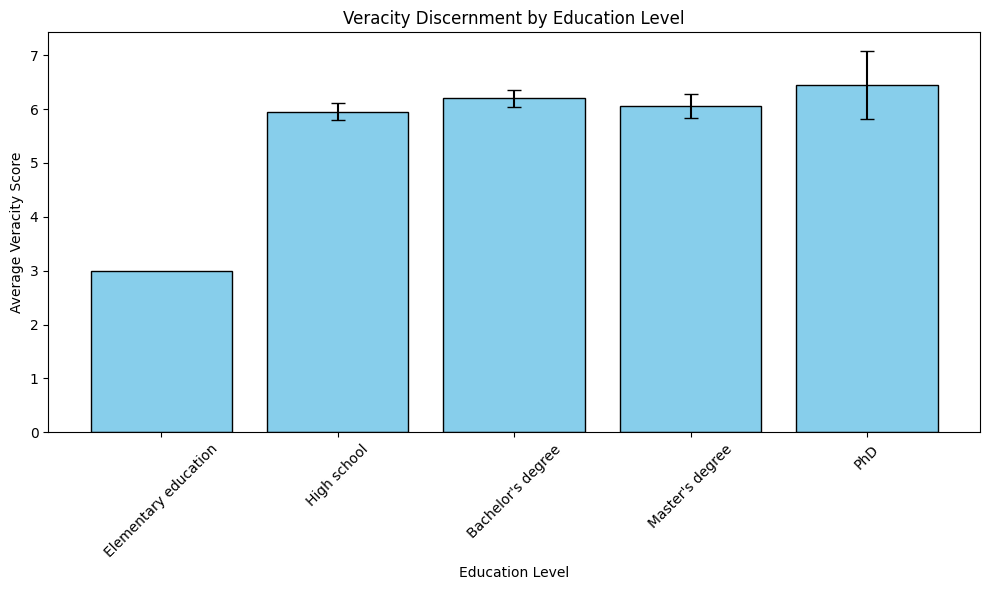

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

def get_working_dir():
    return Path.cwd()

### Process Claims File and Demographics File (for veracity discernment) ###
def compute_veracity_discernment(df):
    # Define claim columns.
    false_cols = ['claim_stock_manipulation', 'claim_left_wing_salary_lie', 
                  'claim_vaccine_toxins', 'claim_government_disease_spread']
    true_cols = ['claim_eu_positive_attitudes', 'claim_hyatt_small_bottles', 
                 'claim_republicans_trump_conduct', 'claim_climate_worry_age_gap']
    
    false_score = df[false_cols].applymap(lambda x: 1 if isinstance(x, str) and x.strip().lower() == "fake news" else 0).sum(axis=1)
    true_score = df[true_cols].applymap(lambda x: 1 if isinstance(x, str) and x.strip().lower() == "real news" else 0).sum(axis=1)
    df["veracity_score"] = false_score + true_score
    return df

def process_claims_file(file_name, expl_type_label):
    path = get_working_dir() / 'data' / 'processed' / file_name
    df = pd.read_csv(path, encoding='utf-8', dtype={'prolific_id': str})
    df = compute_veracity_discernment(df)
    df["expl_type"] = expl_type_label
    return df[['prolific_id', 'veracity_score', 'expl_type']].dropna()

def process_demographics(file_name):
    path = get_working_dir() / 'data' / 'processed' / file_name
    df = pd.read_csv(path, encoding='utf-8', dtype={'prolific_id': str})
    # Filter out "I prefer not to answer"
    df = df[df["education_level"] != "I prefer not to answer"]
    return df[['prolific_id', 'education_level']].dropna()

### File Pairs for Each Explanation Type ###
file_pairs = [
    ("t_claims.csv", "t_demographics.csv", "Text"),
    ("m_claims.csv", "m_demographics.csv", "Meme"),
    ("m_t_claims.csv", "m_t_demographics.csv", "Meme+Context")
]

dfs = []
for claims_file, demo_file, label in file_pairs:
    df_claims = process_claims_file(claims_file, label)
    df_demo = process_demographics(demo_file)
    df_merged = pd.merge(df_claims, df_demo, on="prolific_id", how="inner")
    dfs.append(df_merged)

# Combine data from all explanation types.
df_all = pd.concat(dfs, ignore_index=True)
df_all = df_all.dropna(subset=["veracity_score", "education_level"])

### Map and Order Education Level ###
# Define mapping from original strings to desired labels.
edu_mapping = {
    "Elementary education": "Elementary education",
    "High school diploma or equivalent": "High school",
    "Bachelor's degree": "Bachelor's degree",
    "Master's degree": "Master's degree",
    "Doctoral degree (PhD)": "PhD"
}

df_all["education_level_mapped"] = df_all["education_level"].map(edu_mapping)
df_all = df_all.dropna(subset=["education_level_mapped"])

# Define desired order.
edu_order = ["Elementary education", "High school", "Bachelor's degree", "Master's degree", "PhD"]
df_all["education_level_mapped"] = pd.Categorical(df_all["education_level_mapped"], categories=edu_order, ordered=True)

### Descriptive Statistics and One-Way ANOVA ###
print("Descriptive statistics for veracity discernment by education level (collapsed across explanation types):")
desc_stats = df_all.groupby("education_level_mapped")["veracity_score"].describe()
print(desc_stats)

groups = [group["veracity_score"].values for name, group in df_all.groupby("education_level_mapped")]
anova_result = f_oneway(*groups)
print("\nOne-way ANOVA result for veracity discernment by education level:")
print(f"F = {anova_result.statistic:.3f}, p = {anova_result.pvalue:.3e}")

### Plotting: Bar Graph of Mean Veracity Score by Education Level ###
# Calculate mean and standard error by education level.
grouped = df_all.groupby("education_level_mapped")["veracity_score"]
means = grouped.mean()
sems = grouped.sem()

plt.figure(figsize=(10,6))
plt.bar(means.index, means, yerr=sems, capsize=5, color='skyblue', edgecolor='black')
plt.xlabel('Education Level')
plt.ylabel('Average Veracity Score')
plt.title('Veracity Discernment by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/fv/vf3sjpn92ql19dv_1bf4dl1m0000gn/T/ipykernel_86497/1797218410.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_combined.groupby(["study", "meme_familiarity"]).size().reset_index(name="count")


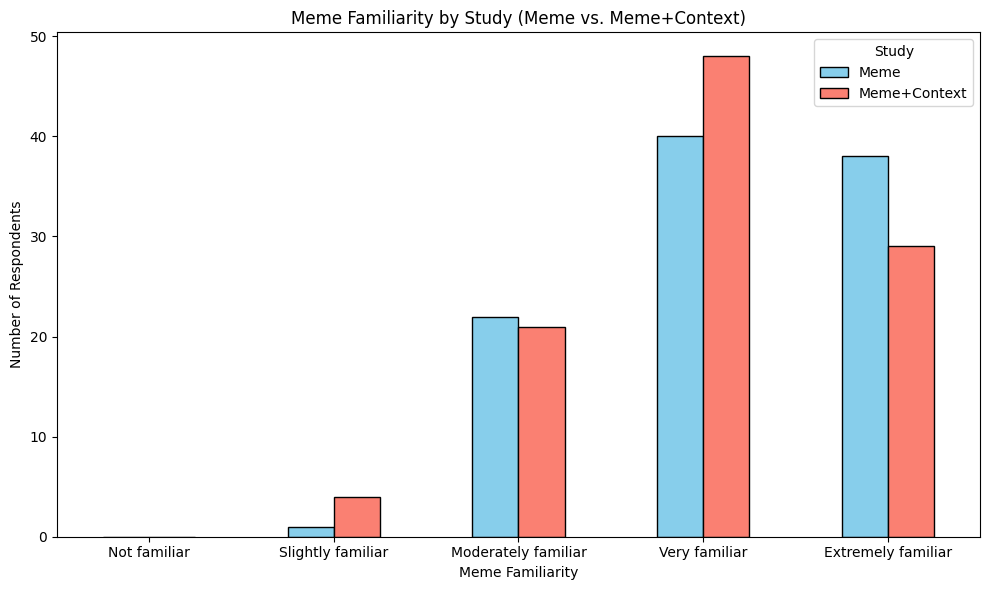

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def get_working_dir():
    return Path.cwd()

# Load the two demographics files.
df_meme = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_demographics.csv')
df_meme_t = pd.read_csv(get_working_dir() / 'data' / 'processed' / 'm_t_demographics.csv')

# Filter out rows where respondents answered "I prefer not to answer" for meme_culture_familiarity.
df_meme = df_meme[df_meme["meme_culture_familiarity"] != "I prefer not to answer"]
df_meme_t = df_meme_t[df_meme_t["meme_culture_familiarity"] != "I prefer not to answer"]

# Map the detailed meme familiarity responses to shorter labels.
familiarity_mapping = {
    "Not familiar at all (I rarely understand meme references)": "Not familiar",
    "Slightly familiar (I understand basic, widely-known memes)": "Slightly familiar",
    "Moderately familiar (I understand most popular memes and their variations)": "Moderately familiar",
    "Very familiar (I understand complex meme references and their evolution)": "Very familiar",
    "Extremely familiar (I actively follow meme trends and their cultural context)": "Extremely familiar"
}

df_meme["meme_familiarity"] = df_meme["meme_culture_familiarity"].map(familiarity_mapping)
df_meme_t["meme_familiarity"] = df_meme_t["meme_culture_familiarity"].map(familiarity_mapping)

# Drop any rows with missing values after mapping.
df_meme = df_meme.dropna(subset=["meme_familiarity"])
df_meme_t = df_meme_t.dropna(subset=["meme_familiarity"])

# Add a column to indicate the study type.
df_meme["study"] = "Meme"
df_meme_t["study"] = "Meme+Context"

# Combine the two DataFrames.
df_combined = pd.concat([df_meme, df_meme_t], ignore_index=True)

# Define the desired Likert order.
familiarity_order = ["Not familiar", "Slightly familiar", "Moderately familiar", "Very familiar", "Extremely familiar"]
df_combined["meme_familiarity"] = pd.Categorical(df_combined["meme_familiarity"], categories=familiarity_order, ordered=True)

# Group by study and meme_familiarity and count the number of responses.
grouped = df_combined.groupby(["study", "meme_familiarity"]).size().reset_index(name="count")

# To create a grouped bar chart, pivot the table so that:
#   - The index is the meme_familiarity (Likert categories).
#   - Each column is one study type.
pivot_table = grouped.pivot(index="meme_familiarity", columns="study", values="count").fillna(0)
pivot_table = pivot_table.reindex(familiarity_order)  # Ensure the proper order

# Plotting a grouped bar chart.
pivot_table.plot(kind="bar", figsize=(10,6), color=["skyblue", "salmon"], edgecolor="black")
plt.xlabel("Meme Familiarity")
plt.ylabel("Number of Respondents")
plt.title("Meme Familiarity by Study (Meme vs. Meme+Context)")
plt.xticks(rotation=0)
plt.legend(title="Study", loc="upper right")
plt.tight_layout()
plt.show()
